# NYC Census Data

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.stats as stats
import seaborn as sns

In [2]:
censusdf = pd.read_csv('nyc_census_tracts.csv')

In [3]:
censusdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 36 columns):
CensusTract        2167 non-null int64
County             2167 non-null object
Borough            2167 non-null object
TotalPop           2167 non-null int64
Men                2167 non-null int64
Women              2167 non-null int64
Hispanic           2128 non-null float64
White              2128 non-null float64
Black              2128 non-null float64
Native             2128 non-null float64
Asian              2128 non-null float64
Citizen            2167 non-null int64
Income             2101 non-null float64
IncomeErr          2101 non-null float64
IncomePerCap       2121 non-null float64
IncomePerCapErr    2121 non-null float64
Poverty            2125 non-null float64
ChildPoverty       2107 non-null float64
Professional       2124 non-null float64
Service            2124 non-null float64
Office             2124 non-null float64
Construction       2124 non-null float64
Pro

In [4]:
censusdf.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [5]:
briefdf = censusdf[['CensusTract', 'Borough', 'TotalPop', 'Women', 'Income', 'Transit']]

In [6]:
briefdf.describe()

,CensusTract,TotalPop,Women,Income,Transit
count,2.167000e+03,2167.000000,2167.000000,2101.000000,2124.000000
mean,3.605476e+10,3888.667743,2035.855561,59101.320800,54.930885
std,2.594875e+07,2240.050968,1212.765249,28802.662945,16.605053
min,3.600500e+10,0.000000,0.000000,9829.000000,0.000000
25%,3.604703e+10,2359.500000,1224.500000,39073.000000,43.300000
50%,3.604712e+10,3550.000000,1848.000000,54505.000000,57.400000
75%,3.608103e+10,4957.500000,2571.500000,73272.000000,67.900000
max,3.608599e+10,28926.000000,15466.000000,244375.000000,100.000000


In [7]:
cleandf = briefdf.dropna(how='any')

In [8]:
cleandf.describe()

,CensusTract,TotalPop,Women,Income,Transit
count,2.101000e+03,2101.000000,2101.000000,2101.000000,2101.000000
mean,3.605462e+10,3998.266540,2095.968586,59101.320800,55.096050
std,2.591998e+07,2172.579526,1179.150247,28802.662945,16.181942
min,3.600500e+10,29.000000,13.000000,9829.000000,0.000000
25%,3.604703e+10,2455.000000,1272.000000,39073.000000,43.500000
50%,3.604712e+10,3623.000000,1871.000000,54505.000000,57.500000
75%,3.608103e+10,5002.000000,2602.000000,73272.000000,67.900000
max,3.608503e+10,28926.000000,15466.000000,244375.000000,100.000000


In [9]:
cleandf.CensusTract.head()

1    36005000200
2    36005000400
3    36005001600
4    36005001900
5    36005002000
Name: CensusTract, dtype: int64

# Pulling in Census Block Location Data

In [10]:
locationdf = pd.read_csv('census_block_loc.csv')

In [11]:
locationdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38396 entries, 0 to 38395
Data columns (total 5 columns):
Latitude     38396 non-null float64
Longitude    38396 non-null float64
BlockCode    38396 non-null int64
County       38396 non-null object
State        38396 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


In [12]:
locationdf.head(20)

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ
5,40.48,-74.264171,340230074021000,Middlesex,NJ
6,40.48,-74.261005,340230074021000,Middlesex,NJ
7,40.48,-74.257839,340230074021000,Middlesex,NJ
8,40.48,-74.254673,340230074025000,Middlesex,NJ
9,40.48,-74.251508,340230074025000,Middlesex,NJ


# Merging the Datasets

In [13]:
locationdf['CensusTract'] = locationdf.BlockCode.astype('str').str[:11]

In [14]:
locationdf['CensusTract'] = locationdf.CensusTract.astype('int64')

In [15]:
locationdf.CensusTract.head(20)

0     34023007600
1     34023007600
2     34023007600
3     34023007600
4     34023007402
5     34023007402
6     34023007402
7     34023007402
8     34023007402
9     34023007402
10    34023007402
11    34023008001
12    34023008001
13    34023008001
14    34023008001
15    36085990100
16    36085990100
17    36085990100
18    36085990100
19    36085990100
Name: CensusTract, dtype: int64

In [16]:
mergedf = pd.merge(cleandf, locationdf, on='CensusTract', how='inner')

In [17]:
mergedf.sample(20)

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State
9973,36085011202,Staten Island,5839,2990,74964.0,25.4,40.561407,-74.090050,360850112020002,Richmond,NY
3762,36047069602,Brooklyn,6667,3522,89375.0,23.3,40.622462,-73.909598,360470696023005,Kings,NY
2995,36047037100,Brooklyn,4705,2443,46641.0,64.8,40.681256,-73.915930,360470371001001,Kings,NY
2656,36047027100,Brooklyn,2502,1196,37104.0,69.9,40.678995,-73.931759,360470271002000,Kings,NY
10583,36085017600,Staten Island,4980,2490,102561.0,20.0,40.522965,-74.169196,360850176003028,Richmond,NY
463,36005011900,Bronx,5603,2925,22097.0,76.8,40.821457,-73.890603,360050119001001,Bronx,NY
3998,36047083800,Brooklyn,2407,1363,66618.0,58.9,40.640553,-73.934925,360470838002001,Kings,NY
9749,36085005900,Staten Island,2900,1530,100645.0,25.0,40.620201,-74.099548,360850059001001,Richmond,NY
8511,36081099705,Queens,2720,1302,71310.0,22.2,40.794322,-73.770302,360810997050001,Queens,NY
9334,36081155102,Queens,7641,4159,84508.0,24.4,40.746834,-73.713317,360811551024002,Queens,NY


In [18]:
mergedf.shape

(11947, 11)

In [19]:
mergedf['%Women'] = mergedf['Women']/mergedf['TotalPop']

In [20]:
mergedf.head()

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State,%Women
0,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.862111,360050002000001,Bronx,NY,0.507866
1,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.858945,360050002000001,Bronx,NY,0.507866
2,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.862111,360050002000001,Bronx,NY,0.507866
3,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.858945,360050002000001,Bronx,NY,0.507866
4,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.855779,360050002000001,Bronx,NY,0.507866


# Income Ranking

In [46]:
m = mergedf.Borough == 'Manhattan'
manhattan = mergedf[m]

highincome = manhattan.Income > 100000

highincomedf = manhattan[highincome]

incgroup = highincomedf.groupby(['CensusTract'])
incmeans = incgroup.agg({'Income': 'mean', 'TotalPop': 'mean'})

highincomehubs = incmeans.nlargest(11, 'Income')

highincomehubs['Station'] = ['77th St', '77th St', '96th St', '5th Ave', '5th Ave', 'Houston St', 
                          'Chambers St', 'Chambers St', '77th St', '14th St', '86th St' ]
highincomehubs

,Income,TotalPop,Station
CensusTract,,,
36061013000,244375.0,3277,77th St
36061014200,235455.0,4467,77th St
36061016001,222222.0,3861,96th St
36061011401,197500.0,1276,5th Ave
36061011202,192857.0,287,5th Ave
36061006900,183750.0,2604,Houston St
36061003100,183500.0,2673,Chambers St
36061031703,182401.0,8875,Chambers St
36061012800,175259.0,6226,77th St


(150000, 250000)

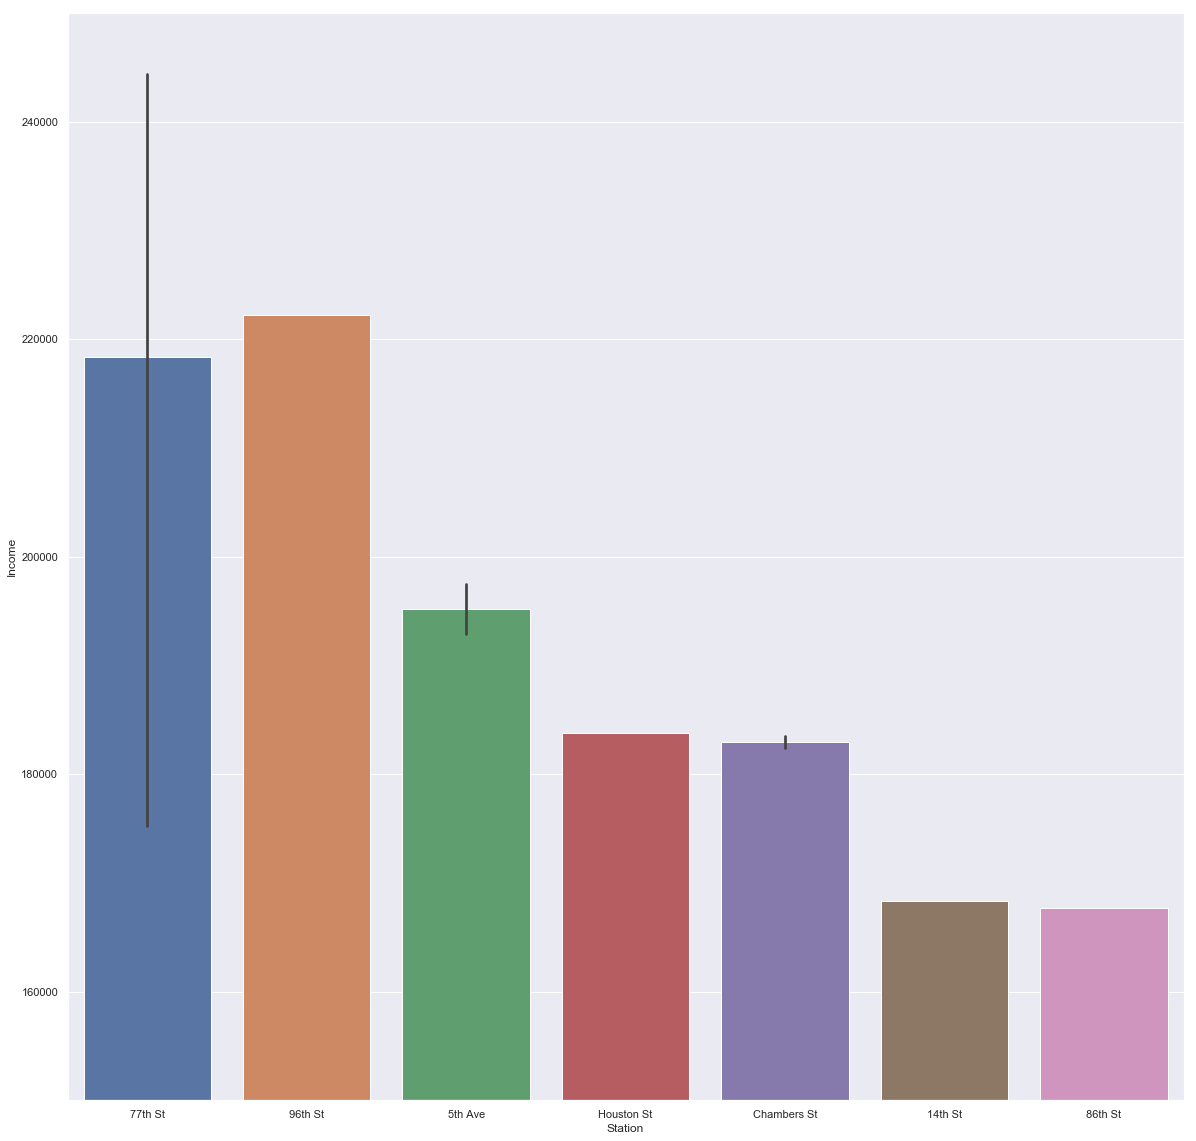

In [64]:
plt.figure(figsize=(20,20))
sns.set()
sns.barplot(x = 'Station',y='Income',data=highincomehubs);
plt.ylim(150000, 250000)

# % Women Ranking

In [43]:
m = mergedf.Borough == 'Manhattan'
manhattan = mergedf[m]

womengroup = manhattan.groupby(['CensusTract'])
womenmeans = womengroup.agg({'%Women': 'mean', 'TotalPop': 'mean'})


womenmeans.nlargest(20, '%Women')

,%Women,TotalPop
CensusTract,,
36061020500,0.669166,5069
36061018900,0.625341,12825
36061024302,0.616107,7239
36061017700,0.613947,9522
36061022302,0.613928,3432
36061011203,0.613208,1166
36061008300,0.609570,3929
36061010900,0.607527,186
36061001002,0.607172,6051


In [40]:
m = mergedf.Borough == 'Manhattan'
manhattan = mergedf[m]

womennumgroup = manhattan.groupby(['CensusTract'])
womennummeans = womengroup.agg({'Women': 'mean', '%Women': 'mean'})


topwomenhubs = womennummeans.nlargest(11, '%Women')

topwomenhubs['Station'] = ['116th St - Columbia Univ', '103rd St', '155th St','96th St', '137th St - City College', 
                             'Lexington Ave - 59th St', '14th St', '34th St - Penn Station', '155th St', '145th St',
                             'Lexington Ave - 86th St']
topwomenhubs

,Women,%Women,Station
CensusTract,,,
36061020500,3392,0.669166,116th St - Columbia Univ
36061018900,8020,0.625341,103rd St
36061024302,4460,0.616107,155th St
36061017700,5846,0.613947,96th St
36061022302,2107,0.613928,137th St - City College
36061011203,715,0.613208,Lexington Ave - 59th St
36061008300,2395,0.609570,14th St
36061010900,113,0.607527,34th St - Penn Station
36061001002,3674,0.607172,155th St


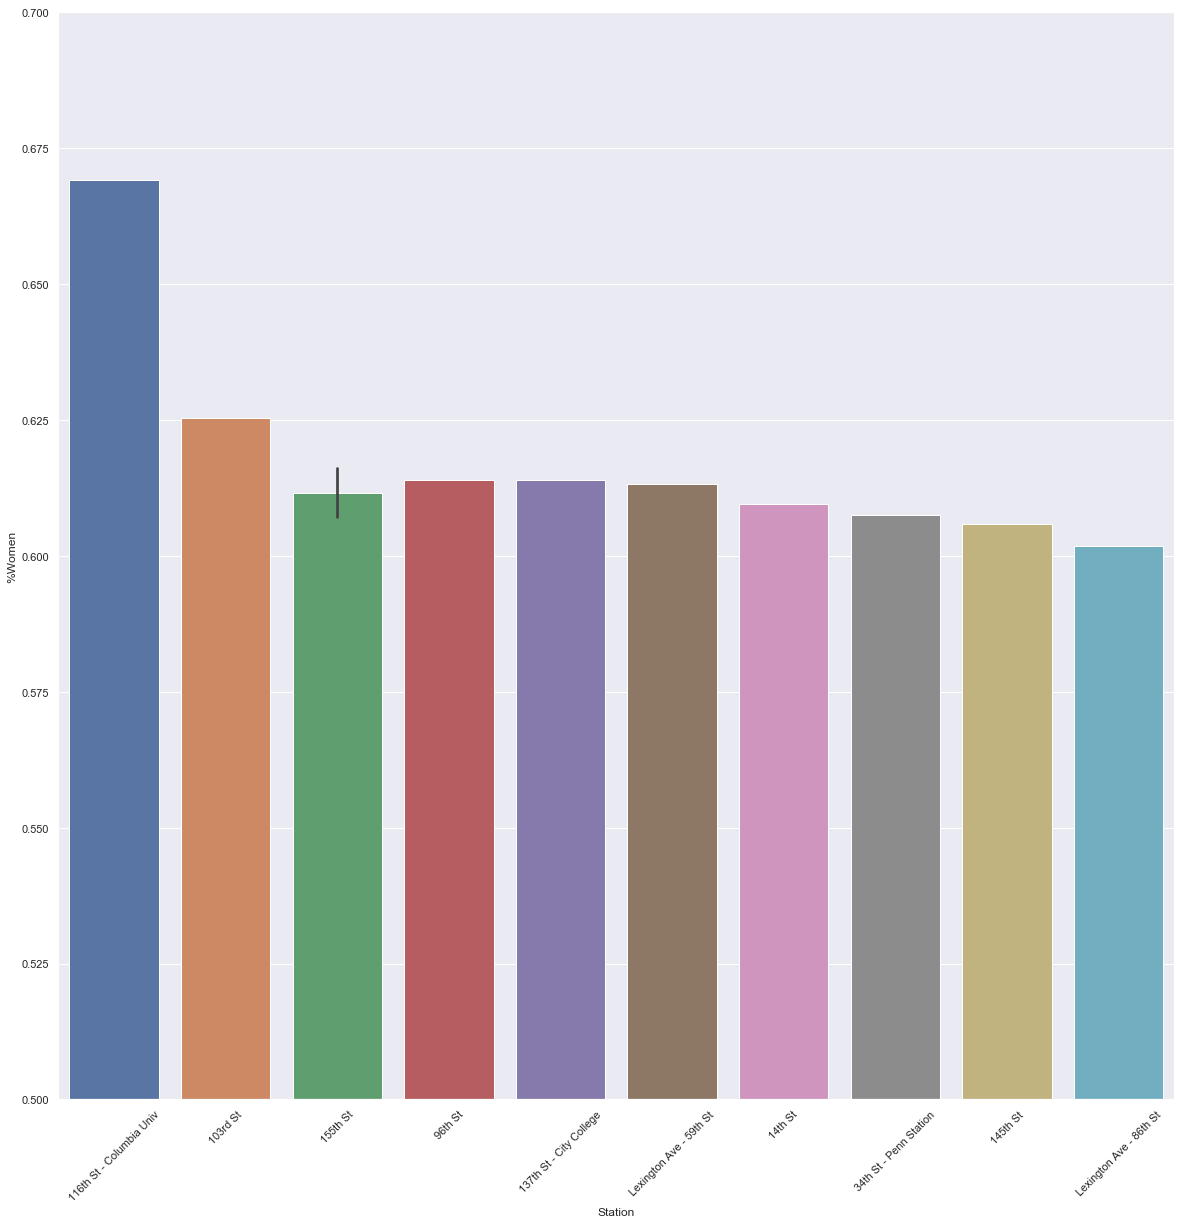

In [190]:
plt.figure(figsize=(20,20))
sns.set()
sns.barplot(x = 'Station',y='%Women',data=topwomenhubs);
plt.ylim(0.5, 0.7)
plt.xticks(rotation=45);

# Largest Public Transit Areas

In [24]:
mergedf['TransitNum'] = mergedf['TotalPop'] * (mergedf['Transit'] / 100)
mergedf.head()

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State,%Women,TransitNum
0,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.862111,360050002000001,Bronx,NY,0.507866,2085.558
1,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.858945,360050002000001,Bronx,NY,0.507866,2085.558
2,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.862111,360050002000001,Bronx,NY,0.507866,2085.558
3,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.858945,360050002000001,Bronx,NY,0.507866,2085.558
4,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.855779,360050002000001,Bronx,NY,0.507866,2085.558


In [31]:
m = mergedf.Borough == 'Manhattan'
manhattan = mergedf[m]

transitgroup = manhattan.groupby(['CensusTract'])
transitmeans = transitgroup.agg({'TransitNum': 'mean'})

toptransithubs = transitmeans.nlargest(11, 'TransitNum')

toptransithubs['Station'] = ['163rd St', '96th & 2nd Ave', '103rd St', '1st Ave', 
                             '86th St', '181st St', '86th St & 7th St', '207th St & Dyckman St', '168th St',
                             '86th St', '137th St - City College']
toptransithubs

,TransitNum,Station
CensusTract,,
36061024500,10436.533,163rd St
36061015400,9859.003,96th & 2nd Ave
36061018900,9708.525,103rd St
36061004400,9412.200,1st Ave
36061013600,9242.160,86th St
36061026100,9177.280,181st St
36061013800,8371.032,86th St & 7th St
36061029100,8179.431,207th St & Dyckman St
36061025300,8142.252,168th St


(7000, 11000)

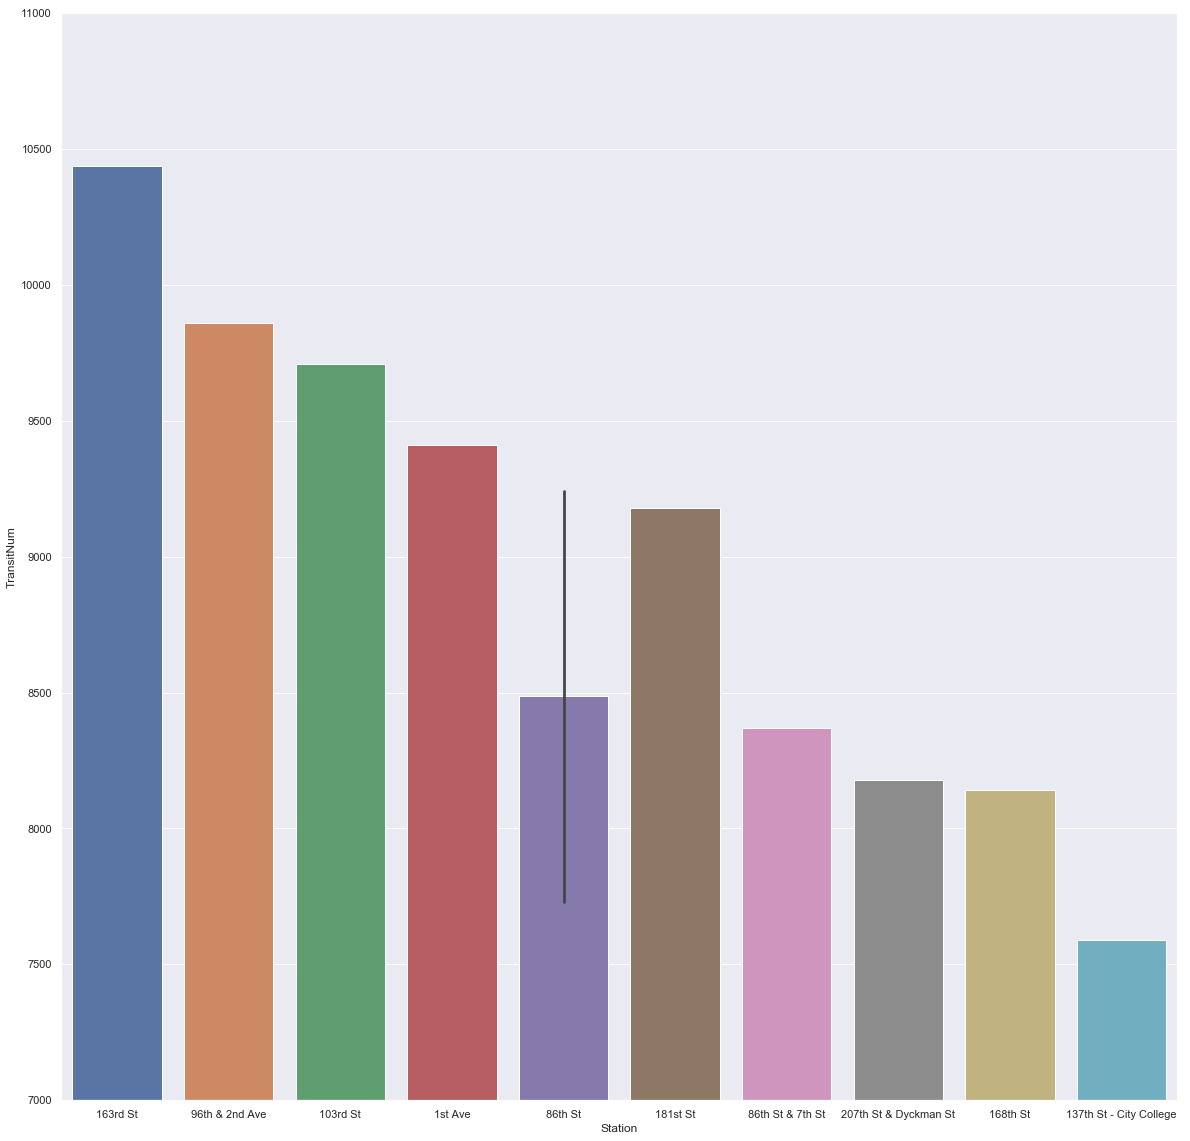

In [62]:
plt.figure(figsize=(20,20))
sns.set()
sns.barplot(x = 'Station',y ='TransitNum',data=toptransithubs);
plt.ylim(7000, 11000)

### Combined Plot

In [151]:
mergedf.head()

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State,%Women,TransitNum
0,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.862111,360050002000001,Bronx,NY,0.507866,2085.558
1,36005000200,Bronx,5403,2744,72034.0,38.6,40.798844,-73.858945,360050002000001,Bronx,NY,0.507866,2085.558
2,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.862111,360050002000001,Bronx,NY,0.507866,2085.558
3,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.858945,360050002000001,Bronx,NY,0.507866,2085.558
4,36005000200,Bronx,5403,2744,72034.0,38.6,40.801106,-73.855779,360050002000001,Bronx,NY,0.507866,2085.558


In [152]:
justhubdf = mergedf[mergedf['CensusTract'].isin([36061013000, 36061014200, 36061016001, 36061011401, 36061011202,
                                            36061006900, 36061003100, 36061031703, 36061012800, 36061005200,
                                            36061014801, 36061020500, 36061018900, 36061024302, 36061017700,
                                            36061022302, 36061011203, 36061008300, 36061010900, 36061001002, 
                                            36061021400, 36061015002, 36061024500, 36061015400, 36061018900,
                                            36061004400, 36061013600, 36061026100, 36061013800, 36061029100,
                                            36061025300, 36061017500, 36061022500])]
justhubdf.head()

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,BlockCode,County,State,%Women,TransitNum
4575,36061001002,Manhattan,6051,3674,17560.0,70.5,40.712915,-73.969749,360610010020001,New York,NY,0.607172,4265.955
4576,36061001002,Manhattan,6051,3674,17560.0,70.5,40.715176,-73.976080,360610010023000,New York,NY,0.607172,4265.955
4577,36061001002,Manhattan,6051,3674,17560.0,70.5,40.715176,-73.972915,360610010020001,New York,NY,0.607172,4265.955
4578,36061001002,Manhattan,6051,3674,17560.0,70.5,40.715176,-73.969749,360610010020001,New York,NY,0.607172,4265.955
4579,36061001002,Manhattan,6051,3674,17560.0,70.5,40.717437,-73.979246,360610010021003,New York,NY,0.607172,4265.955


In [153]:
incomemergedf = pd.merge(justhubdf, highincomehubs, on='CensusTract', how='outer')

womenmergedf = pd.merge(incomemergedf, topwomenhubs, on='CensusTract', how='outer')

transitmergedf = pd.merge(womenmergedf, toptransithubs, on='CensusTract', how='outer')

transitmergedf.sample(15)

,CensusTract,Borough,TotalPop_x,Women_x,Income_x,Transit,Latitude,Longitude,BlockCode,County,...,%Women_x,TransitNum_x,Income_y,TotalPop_y,Station_x,Women_y,%Women_y,Station_y,TransitNum_y,Station
64,36061016001,Manhattan,3861,2055,222222.0,41.8,40.785276,-73.953920,360610160012000,New York,...,0.532246,1613.898,222222.0,3861.0,96th St,NaN,NaN,NaN,NaN,NaN
66,36061017500,Manhattan,10840,5631,137344.0,71.3,40.789799,-73.976080,360610175005000,New York,...,0.519465,7728.920,NaN,NaN,NaN,NaN,NaN,NaN,7728.920,86th St
69,36061017500,Manhattan,10840,5631,137344.0,71.3,40.792060,-73.979246,360610175001001,New York,...,0.519465,7728.920,NaN,NaN,NaN,NaN,NaN,NaN,7728.920,86th St
63,36061016001,Manhattan,3861,2055,222222.0,41.8,40.785276,-73.957085,360610160013001,New York,...,0.532246,1613.898,222222.0,3861.0,96th St,NaN,NaN,NaN,NaN,NaN
55,36061014200,Manhattan,4467,2605,235455.0,27.8,40.776231,-73.960251,360610142002002,New York,...,0.583165,1241.826,235455.0,4467.0,77th St,NaN,NaN,NaN,NaN,NaN
8,36061003100,Manhattan,2673,1422,183500.0,54.9,40.715176,-74.004573,360610031001014,New York,...,0.531987,1467.477,183500.0,2673.0,Chambers St,NaN,NaN,NaN,NaN,NaN
86,36061020500,Manhattan,5069,3392,111875.0,36.0,40.812412,-73.963417,360610205001003,New York,...,0.669166,1824.840,NaN,NaN,NaN,3392.0,0.669166,116th St - Columbia Univ,NaN,NaN
2,36061001002,Manhattan,6051,3674,17560.0,70.5,40.715176,-73.972915,360610010020001,New York,...,0.607172,4265.955,NaN,NaN,NaN,3674.0,0.607172,155th St,NaN,NaN
6,36061001002,Manhattan,6051,3674,17560.0,70.5,40.717437,-73.972915,360610010020001,New York,...,0.607172,4265.955,NaN,NaN,NaN,3674.0,0.607172,155th St,NaN,NaN
53,36061013800,Manhattan,13162,7565,118358.0,63.6,40.776231,-73.953920,360610138004001,New York,...,0.574761,8371.032,NaN,NaN,NaN,NaN,NaN,NaN,8371.032,86th St & 7th St


In [154]:
cleandf = transitmergedf.drop(columns=['Income_y', 'TotalPop_y', 'Women_y', 'TransitNum_y',
                                       '%Women_y', 'BlockCode', 'TransitNum_y'])

cleandf.fillna('', inplace=True)

cleandf['Stations'] = cleandf['Station_y'] + cleandf['Station_x'] + cleandf['Station']

cleanerdf = cleandf.drop(columns=['Station_x', 'Station_y', 'Station'])

cleanerdf.rename(columns={'TotalPop_x': 'TotalPop', 'Women_x': 'Women', 'Income_x': 'Income', 
                          '%Women_x': '%Women', 'TransitNum_x': 'TransitNum'}, inplace=True)

cleanerdf.sample(20)

,CensusTract,Borough,TotalPop,Women,Income,Transit,Latitude,Longitude,County,State,%Women,TransitNum,Stations
117,36061031703,Manhattan,8875,4408,182401.0,45.1,40.715176,-74.017236,New York,NY,0.496676,4002.625,Chambers St
41,36061011401,Manhattan,1276,702,197500.0,37.0,40.764925,-73.969749,New York,NY,0.550157,472.120,5th Ave
45,36061013000,Manhattan,3277,1870,244375.0,19.1,40.771709,-73.963417,New York,NY,0.570644,625.907,77th St
110,36061026100,Manhattan,13496,6977,29702.0,68.0,40.846332,-73.934925,New York,NY,0.516968,9177.280,181st St
65,36061017500,Manhattan,10840,5631,137344.0,71.3,40.789799,-73.979246,New York,NY,0.519465,7728.920,86th St
23,36061005200,Manhattan,3726,1899,168375.0,48.4,40.735528,-73.991910,New York,NY,0.509662,1803.384,14th St
81,36061020500,Manhattan,5069,3392,111875.0,36.0,40.810151,-73.966583,New York,NY,0.669166,1824.840,116th St - Columbia Univ
112,36061029100,Manhattan,12337,6536,28743.0,66.3,40.864422,-73.922261,New York,NY,0.529788,8179.431,207th St & Dyckman St
43,36061012800,Manhattan,6226,3181,175259.0,40.5,40.771709,-73.960251,New York,NY,0.510922,2521.530,77th St
113,36061031703,Manhattan,8875,4408,182401.0,45.1,40.712915,-74.020402,New York,NY,0.496676,4002.625,Chambers St


In [158]:
hubsdf = cleanerdf.filter(['%Women', 'Income', 'TransitNum', 'Stations'])

hubs = hubsdf.drop_duplicates()

hubs

,%Women,Income,TransitNum,Stations
0,0.607172,17560.0,4265.955,155th St
7,0.531987,183500.0,1467.477,Chambers St
10,0.574506,93010.0,9412.200,1st Ave
23,0.509662,168375.0,1803.384,14th St
26,0.444316,183750.0,1169.196,Houston St
33,0.609570,69303.0,2671.720,14th St
36,0.607527,135750.0,90.024,34th St - Penn Station
38,0.501742,192857.0,29.561,5th Ave
39,0.613208,128083.0,315.986,Lexington Ave - 59th St
41,0.550157,197500.0,472.120,5th Ave


In [160]:
stationgroup = hubs.groupby(['Stations'])
stationsdf = stationgroup.agg({'%Women': 'mean', 'Income': 'mean', 'TransitNum': 'mean'})

stationsdf

,%Women,Income,TransitNum
Stations,,,
103rd St103rd St,0.625341,28158.0,9708.525000
116th St - Columbia Univ,0.669166,111875.0,1824.840000
137th St - City College,0.570719,36199.0,5023.051500
145th St,0.605920,44405.0,2342.453000
14th St,0.559616,118839.0,2237.552000
155th St,0.611640,18965.5,4615.954500
163rd St,0.487709,35394.0,10436.533000
168th St,0.498728,36780.0,8142.252000
181st St,0.516968,29702.0,9177.280000


<Figure size 1440x1440 with 0 Axes>

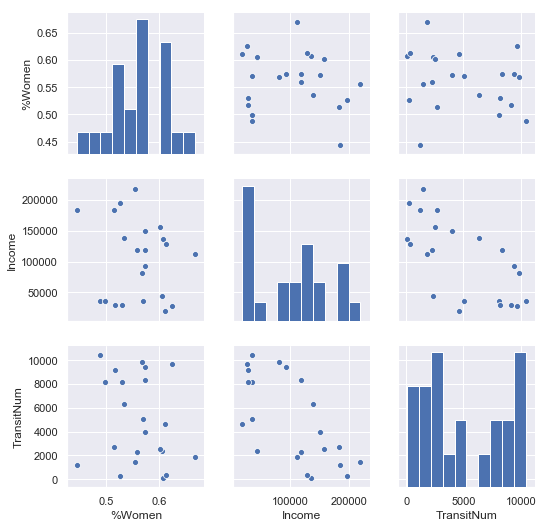

In [175]:
plt.figure(figsize=(20,20))
sns.set()
sns.pairplot(stationsdf);

In [182]:
# weighing data

stationsdf['Weight'] = stationsdf['Income'] * stationsdf['TransitNum'] * stationsdf['%Women']

stationsdf.reset_index(inplace=True)

stationsdf

,Stations,%Women,Income,TransitNum,Weight
0,103rd St103rd St,0.625341,28158.0,9708.525000,1.709512e+08
1,116th St - Columbia Univ,0.669166,111875.0,1824.840000,1.366128e+08
2,137th St - City College,0.570719,36199.0,5023.051500,1.037735e+08
3,145th St,0.605920,44405.0,2342.453000,6.302570e+07
4,14th St,0.559616,118839.0,2237.552000,1.488066e+08
5,155th St,0.611640,18965.5,4615.954500,5.354532e+07
6,163rd St,0.487709,35394.0,10436.533000,1.801550e+08
7,168th St,0.498728,36780.0,8142.252000,1.493552e+08
8,181st St,0.516968,29702.0,9177.280000,1.409170e+08
9,1st Ave,0.574506,93010.0,9412.200000,5.029392e+08


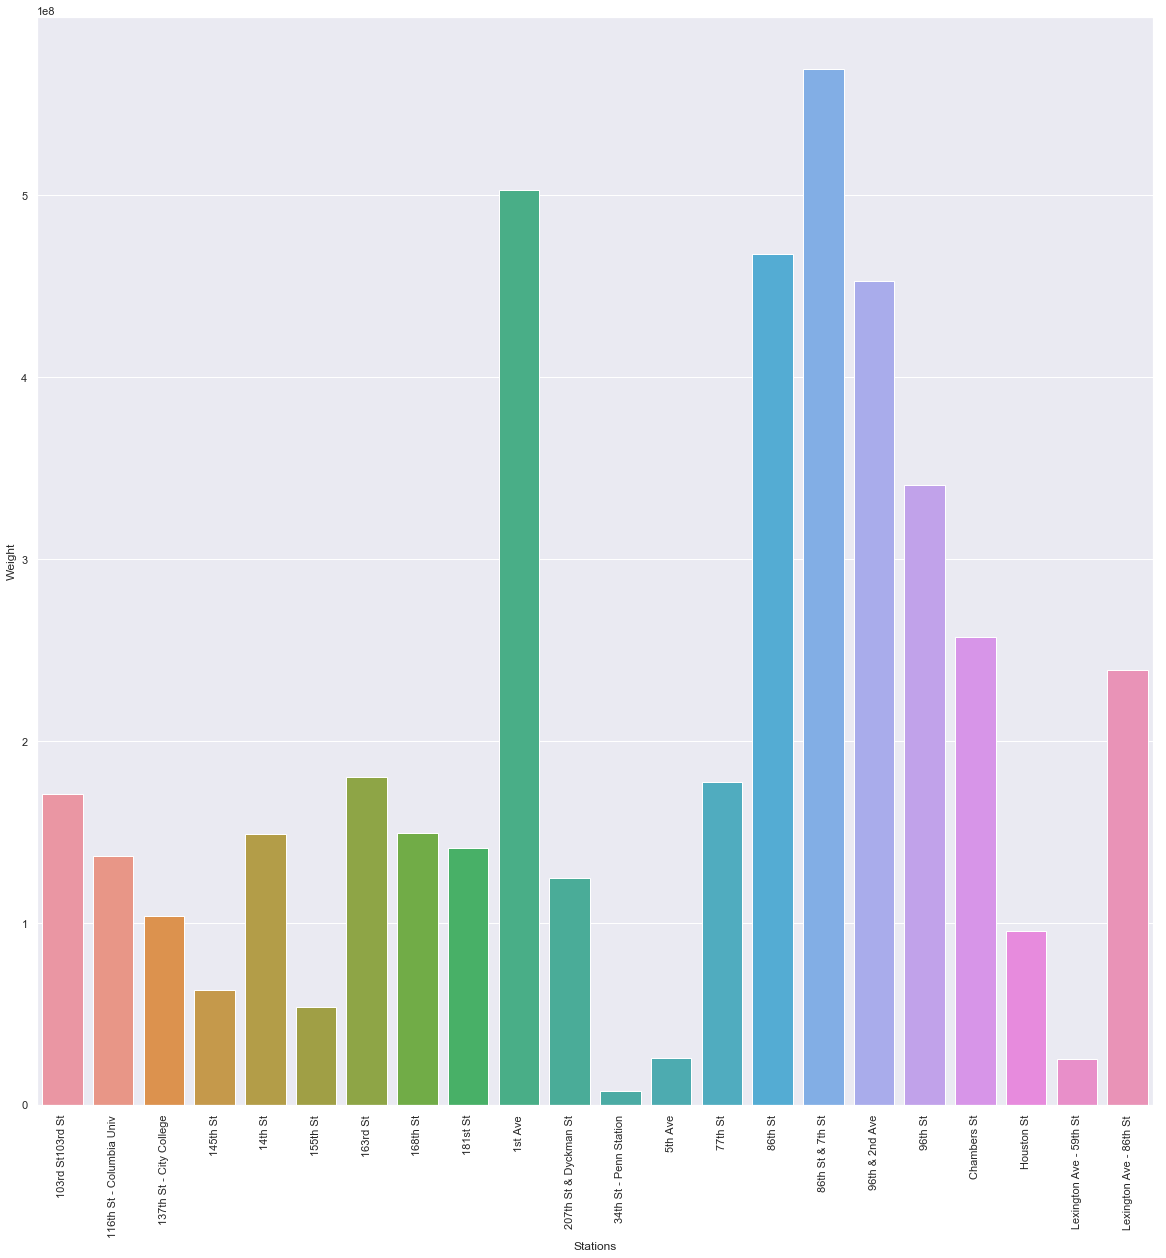

In [188]:
plt.figure(figsize=(20,20))
sns.set()
sns.barplot(x = 'Stations', y = 'Weight', data=stationsdf);
plt.xticks(rotation=90);

# Mapping

### Geopandas

In [65]:
mappointsdf = manhathighincdf[['Income', 'Latitude', 'Longitude']]
mappointsdf.head(10)

,Income,Latitude,Longitude
4545,117841.0,40.699347,-74.001407
4546,117841.0,40.699347,-73.998241
4547,117841.0,40.701608,-74.004573
4548,117841.0,40.701608,-74.001407
4549,117841.0,40.703869,-74.007739
4550,117841.0,40.703869,-74.004573
4551,117841.0,40.706131,-74.007739
4552,117841.0,40.708392,-74.010905
4558,147500.0,40.694824,-74.001407
4559,147500.0,40.697085,-74.004573


In [41]:
import geopandas as gpd
from shapely.geometry import Point

In [42]:
mappointsdf['Coordinates'] = list(zip(mappointsdf.Longitude, mappointsdf.Latitude))
mappointsdf['Coordinates'] = mappointsdf['Coordinates'].apply(Point)

gdf = gpd.GeoDataFrame(mappointsdf, geometry='Coordinates')

print(gdf.head())

        Income   Latitude  Longitude                           Coordinates
4545  117841.0  40.699347 -74.001407  POINT (-74.0014070352 40.6993467337)
4546  117841.0  40.699347 -73.998241   POINT (-73.998241206 40.6993467337)
4547  117841.0  40.701608 -74.004573  POINT (-74.0045728643 40.7016080402)
4548  117841.0  40.701608 -74.001407  POINT (-74.0014070352 40.7016080402)
4549  117841.0  40.703869 -74.007739  POINT (-74.0077386935 40.7038693467)


/anaconda3/envs/ENV1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/ENV1/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


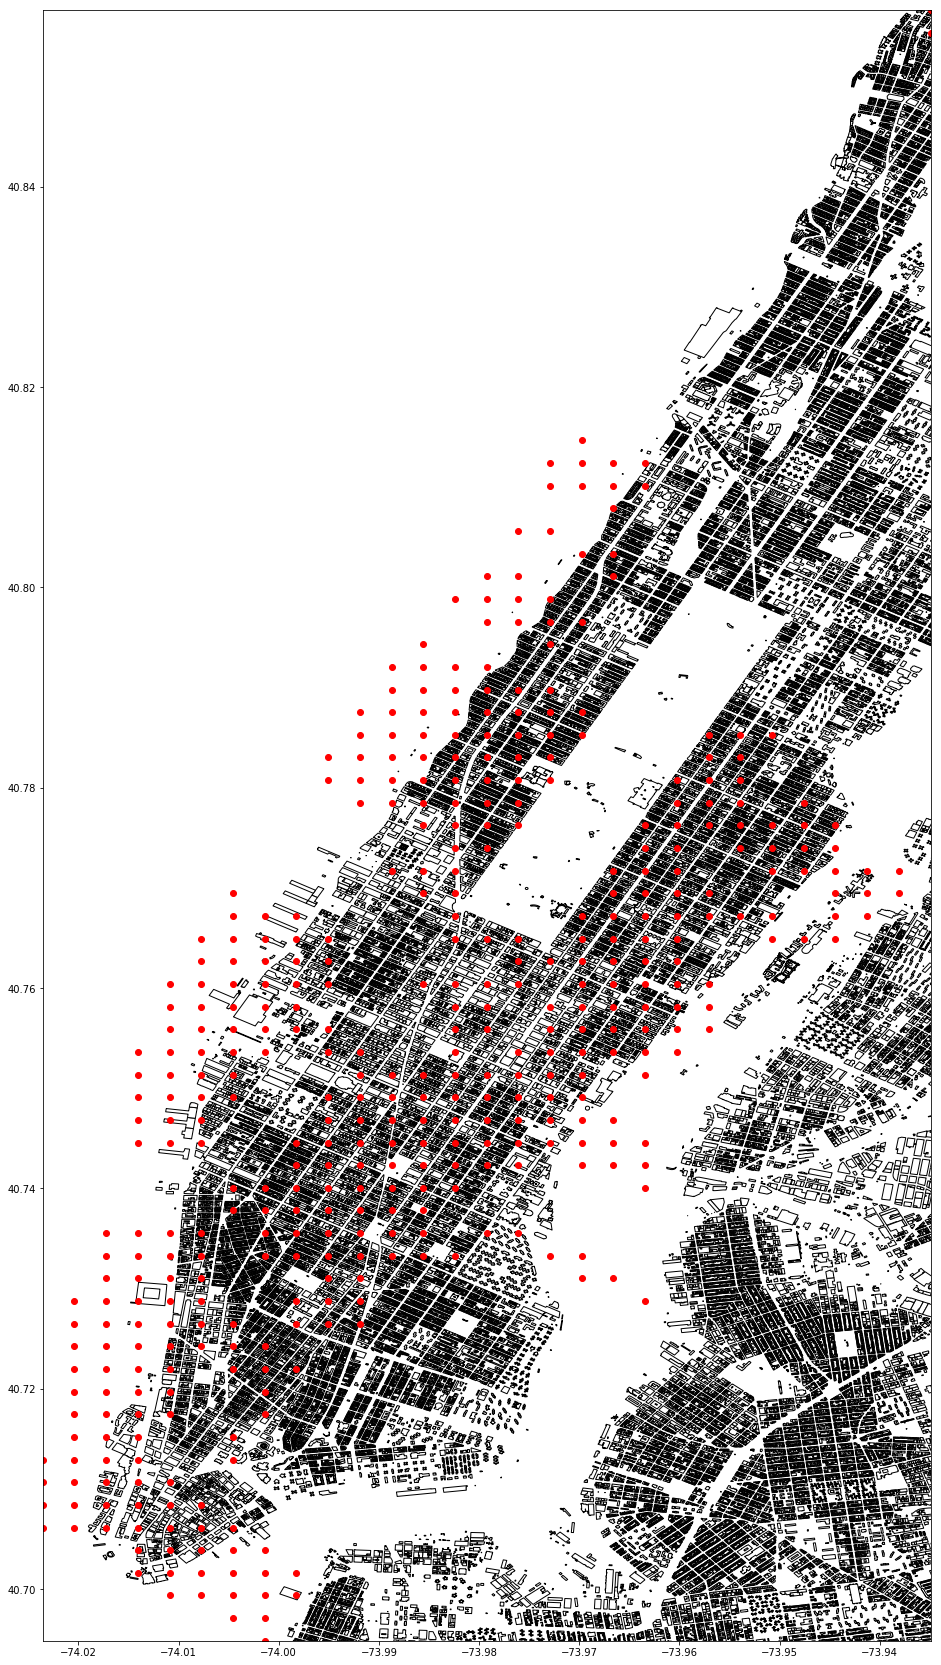

In [55]:
# world = gpd.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# cities = gpd.read_file(geopandas.datasets.get_path('naturalearth_cities'))

NYC = gpd.read_file("map.shp")

minx = -74.03
maxx = -73.93
maxy = 40.82
miny = 40.69


ax = NYC.plot(color='white', edgecolor='black', figsize=(20,30))

minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

gdf.plot(ax=ax, color='red')

plt.show()